In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
data=pd.read_csv("Dataset.csv")

In [62]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2022 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09-04-2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27-04-2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [63]:
data=data.dropna(axis=0)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


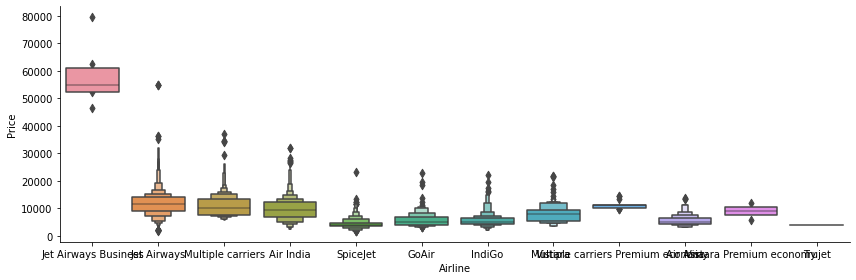

In [65]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

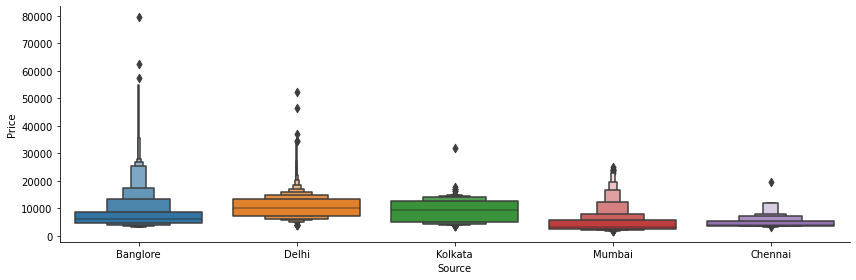

In [66]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

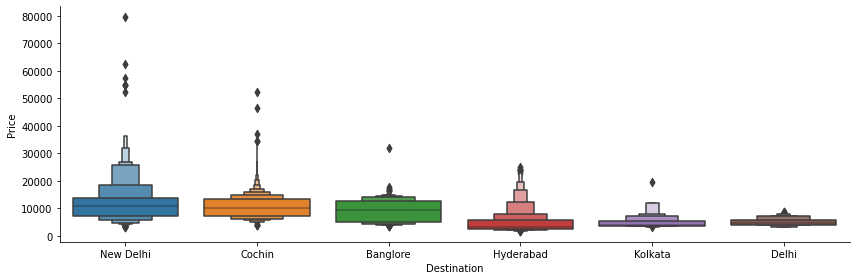

In [67]:
sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [68]:
X=data.iloc[:,0:10]
Y=data.iloc[:,10]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [70]:
Class = {'IndiGo': 'Economy',
         'GoAir': 'Economy',
         'Vistara': 'Economy',
         'Vistara Premium economy': 'Premium Economy',
         'Air Asia': 'Economy',
         'Trujet': 'Economy',
         'Jet Airways': 'Economy',
         'SpiceJet': 'Economy',
         'Jet Airways Business': 'Business',
         'Air India': 'Economy',
         'Multiple carriers': 'Economy',
         'Multiple carriers Premium economy': 'Premium Economy'}
         
X_train['Booking_Class'] = X_train['Airline'].map(Class)
X_test['Booking_Class'] = X_test['Airline'].map(Class)

C:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [71]:
X_train['Total_Stops'] = X_train['Total_Stops'].replace('non-stop','0')
X_train['Total_Stops'] = X_train['Total_Stops'].replace('2 stops','2')
X_train['Total_Stops'] = X_train['Total_Stops'].replace('3 stops','3')
X_train['Total_Stops'] = X_train['Total_Stops'].replace('4 stops','4')
X_train['Total_Stops'] = X_train['Total_Stops'].replace('1 stop','1')

X_train['Total_Stops'] = X_train['Total_Stops'].astype(float)


X_test['Total_Stops'] = X_test['Total_Stops'].replace('non-stop','0')
X_test['Total_Stops'] = X_test['Total_Stops'].replace('2 stops','2')
X_test['Total_Stops'] = X_test['Total_Stops'].replace('3 stops','3')
X_test['Total_Stops'] = X_test['Total_Stops'].replace('4 stops','4')
X_test['Total_Stops'] = X_test['Total_Stops'].replace('1 stop','1')

X_test['Total_Stops'] = X_test['Total_Stops'].astype(float)

In [72]:
X_train['Journey_Day'] = pd.to_datetime(X_train.Date_of_Journey, format='%d-%m-%Y').dt.day

X_train['Journey_Month'] = pd.to_datetime(X_train.Date_of_Journey, format='%d-%m-%Y').dt.month

X_test['Journey_Day'] = pd.to_datetime(X_test.Date_of_Journey, format='%d-%m-%Y').dt.day

X_test['Journey_Month'] = pd.to_datetime(X_test.Date_of_Journey, format='%d-%m-%Y').dt.month

In [73]:
X_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Booking_Class,Journey_Day,Journey_Month
749,Jet Airways,27-06-2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,0.0,No info,Economy,27,6
6077,SpiceJet,21-06-2019,Kolkata,Banglore,CCU → BLR,17:10,19:40,2h 30m,0.0,No info,Economy,21,6
2373,Multiple carriers,27-05-2019,Delhi,Cochin,DEL → BOM → COK,15:00,28-05-2022 01:30,10h 30m,1.0,No info,Economy,27,5
2442,Air Asia,09-05-2019,Kolkata,Banglore,CCU → DEL → BLR,22:40,10-05-2022 10:40,12h,1.0,No info,Economy,9,5
5402,Air India,09-06-2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,10-06-2022 19:15,23h 30m,2.0,No info,Economy,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Jet Airways,27-03-2019,Delhi,Cochin,DEL → BOM → COK,09:00,28-03-2022 04:25,19h 25m,1.0,No info,Economy,27,3
5191,Jet Airways,09-05-2019,Kolkata,Banglore,CCU → BOM → BLR,14:05,20:45,6h 40m,1.0,In-flight meal not included,Economy,9,5
5390,Multiple carriers,15-05-2019,Delhi,Cochin,DEL → BOM → COK,12:50,16-05-2022 01:30,12h 40m,1.0,No info,Economy,15,5
860,IndiGo,03-03-2019,Banglore,New Delhi,BLR → DEL,00:40,03:25,2h 45m,0.0,No info,Economy,3,3


In [74]:
## reference taken from online sources

duration = list(X_train['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
X_train['Duration'] = np.array(dur_hours)*60+np.array(dur_minutes)


duration = list(X_test['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
X_test['Duration'] = np.array(dur_hours)*60+np.array(dur_minutes)




C:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [75]:
X_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Booking_Class,Journey_Day,Journey_Month
749,Jet Airways,27-06-2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,90,0.0,No info,Economy,27,6
6077,SpiceJet,21-06-2019,Kolkata,Banglore,CCU → BLR,17:10,19:40,150,0.0,No info,Economy,21,6
2373,Multiple carriers,27-05-2019,Delhi,Cochin,DEL → BOM → COK,15:00,28-05-2022 01:30,630,1.0,No info,Economy,27,5
2442,Air Asia,09-05-2019,Kolkata,Banglore,CCU → DEL → BLR,22:40,10-05-2022 10:40,720,1.0,No info,Economy,9,5
5402,Air India,09-06-2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,10-06-2022 19:15,1410,2.0,No info,Economy,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Jet Airways,27-03-2019,Delhi,Cochin,DEL → BOM → COK,09:00,28-03-2022 04:25,1165,1.0,No info,Economy,27,3
5191,Jet Airways,09-05-2019,Kolkata,Banglore,CCU → BOM → BLR,14:05,20:45,400,1.0,In-flight meal not included,Economy,9,5
5390,Multiple carriers,15-05-2019,Delhi,Cochin,DEL → BOM → COK,12:50,16-05-2022 01:30,760,1.0,No info,Economy,15,5
860,IndiGo,03-03-2019,Banglore,New Delhi,BLR → DEL,00:40,03:25,165,0.0,No info,Economy,3,3


In [76]:
X_train['Depart_Time_Hour'] = pd.to_datetime(X_train.Dep_Time).dt.hour
X_train['Depart_Time_Minutes'] = pd.to_datetime(X_train.Dep_Time).dt.minute

X_test['Depart_Time_Hour'] = pd.to_datetime(X_test.Dep_Time).dt.hour
X_test['Depart_Time_Minutes'] = pd.to_datetime(X_test.Dep_Time).dt.minute


C:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [77]:
X_train=X_train.drop(['Date_of_Journey','Dep_Time','Route','Arrival_Time'],axis=1)
X_test=X_test.drop(['Date_of_Journey','Dep_Time','Route','Arrival_Time'],axis=1)

In [78]:
X_train

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Booking_Class,Journey_Day,Journey_Month,Depart_Time_Hour,Depart_Time_Minutes
749,Jet Airways,Mumbai,Hyderabad,90,0.0,No info,Economy,27,6,10,20
6077,SpiceJet,Kolkata,Banglore,150,0.0,No info,Economy,21,6,17,10
2373,Multiple carriers,Delhi,Cochin,630,1.0,No info,Economy,27,5,15,0
2442,Air Asia,Kolkata,Banglore,720,1.0,No info,Economy,9,5,22,40
5402,Air India,Delhi,Cochin,1410,2.0,No info,Economy,9,6,19,45
...,...,...,...,...,...,...,...,...,...,...,...
5734,Jet Airways,Delhi,Cochin,1165,1.0,No info,Economy,27,3,9,0
5191,Jet Airways,Kolkata,Banglore,400,1.0,In-flight meal not included,Economy,9,5,14,5
5390,Multiple carriers,Delhi,Cochin,760,1.0,No info,Economy,15,5,12,50
860,IndiGo,Banglore,New Delhi,165,0.0,No info,Economy,3,3,0,40


In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7477 entries, 749 to 7270
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              7477 non-null   object 
 1   Source               7477 non-null   object 
 2   Destination          7477 non-null   object 
 3   Duration             7477 non-null   int32  
 4   Total_Stops          7477 non-null   float64
 5   Additional_Info      7477 non-null   object 
 6   Booking_Class        7477 non-null   object 
 7   Journey_Day          7477 non-null   int64  
 8   Journey_Month        7477 non-null   int64  
 9   Depart_Time_Hour     7477 non-null   int64  
 10  Depart_Time_Minutes  7477 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 671.8+ KB


In [80]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  OrdinalEncoder,OneHotEncoder

In [81]:
cols2=[1,2,5,6]
cols1=[0]
trans = make_column_transformer((OneHotEncoder(),cols1),(OrdinalEncoder(),cols2),remainder = 'passthrough')


In [82]:
X_train_new=trans.fit_transform(X_train)
X_test_new=trans.transform(X_test)

In [83]:
train_data=pd.DataFrame(X_train_new)
train_data["Price"]=np.array(y_train)

In [84]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,Price
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,8.0,1.0,90.0,0.0,27.0,6.0,10.0,20.0,8040
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,8.0,1.0,150.0,0.0,21.0,6.0,17.0,10.0,3873
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,8.0,1.0,630.0,1.0,27.0,5.0,15.0,0.0,13377
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,1.0,720.0,1.0,9.0,5.0,22.0,40.0,5192
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,8.0,1.0,1410.0,2.0,9.0,6.0,19.0,45.0,9968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,8.0,1.0,1165.0,1.0,27.0,3.0,9.0,0.0,12242
7473,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,400.0,1.0,9.0,5.0,14.0,5.0,10844
7474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,8.0,1.0,760.0,1.0,15.0,5.0,12.0,50.0,7670
7475,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,8.0,1.0,165.0,0.0,3.0,3.0,0.0,40.0,6144


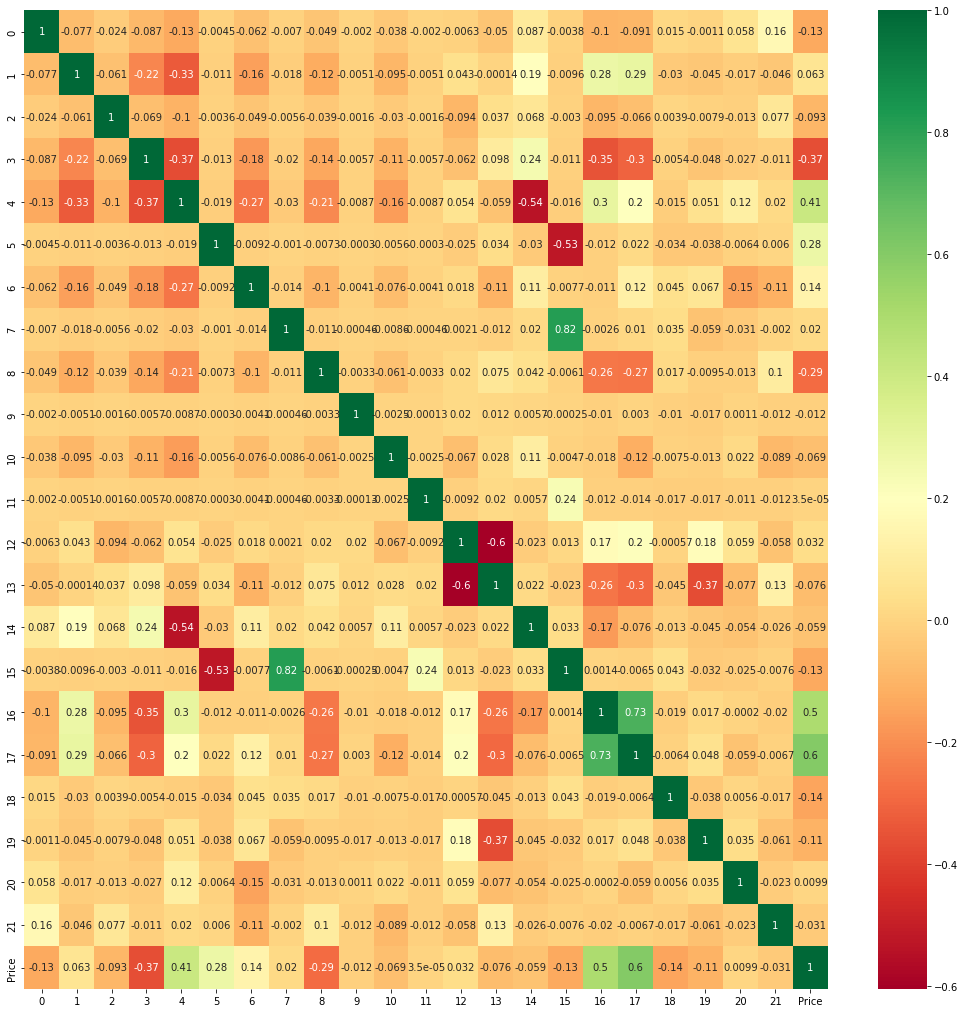

In [85]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [86]:
# from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train_new)


array([[-0.175333  , -0.44070191, -0.13863724, ...,  1.10593642,
        -0.42286985, -0.2492849 ],
       [-0.175333  , -0.44070191, -0.13863724, ...,  1.10593642,
         0.79287225, -0.78366081],
       [-0.175333  , -0.44070191, -0.13863724, ...,  0.24770221,
         0.44551737, -1.31803673],
       ...,
       [-0.175333  , -0.44070191, -0.13863724, ...,  0.24770221,
        -0.07551496,  1.35384284],
       [-0.175333  , -0.44070191, -0.13863724, ..., -1.46876621,
        -2.15964427,  0.81946693],
       [-0.175333  , -0.44070191, -0.13863724, ...,  1.10593642,
         0.09816248, -1.31803673]])

In [88]:
sc.fit_transform(X_test_new)

array([[-0.17572164, -0.44763214, -0.12967159, ...,  0.2563442 ,
         0.41536118, -0.99656184],
       [-0.17572164, -0.44763214,  7.71178955, ...,  1.11664072,
        -0.4580364 ,  0.59261505],
       [-0.17572164, -0.44763214, -0.12967159, ...,  0.2563442 ,
         1.28875876, -0.20197339],
       ...,
       [-0.17572164, -0.44763214, -0.12967159, ...,  0.2563442 ,
         0.24068167,  0.06288942],
       [-0.17572164,  2.23397722, -0.12967159, ...,  0.2563442 ,
         1.46343828, -0.99656184],
       [-0.17572164, -0.44763214, -0.12967159, ...,  0.2563442 ,
        -0.80739543,  0.59261505]])

In [89]:
print(X_train_new.shape)
print(X_test_new.shape)

(7477, 22)
(3205, 22)


XGB Regressor

In [90]:
import xgboost as xgb
xgbr = xgb.XGBRegressor() 
xgbr.fit(X_train_new, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [91]:
y_train_pred=xgbr.predict(X_train_new)
mse = mean_squared_error(y_train, y_train_pred)
print("MSE for train data: %.2f" % mse)

MSE for train data: 672440.39


In [92]:
y_test_pred=xgbr.predict(X_test_new)
mse = mean_squared_error(y_test, y_test_pred)
print("MSE for test data: %.2f" % mse)

MSE for test data: 2251652.33


In [93]:


score = xgbr.score(X_train_new, y_train)  
print("Training score: ", score)

Training score:  0.9689154597554712


In [94]:
score = xgbr.score(X_test_new, y_test)  
print("Testing score: ", score)

Testing score:  0.8896298990716066


Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train_new, y_train)

RandomForestRegressor()

In [96]:
y_train_pred=reg_rf.predict(X_train_new)
mse = mean_squared_error(y_train, y_train_pred)
print("MSE for train data: %.2f" % mse)

MSE for train data: 440590.62


In [97]:
y_test_pred=reg_rf.predict(X_test_new)
mse = mean_squared_error(y_test, y_test_pred)
print("MSE for test data: %.2f" % mse)

MSE for test data: 2354740.05


In [98]:
score=reg_rf.score(X_train_new, y_train)
print("Training score: ", score)

Training score:  0.9796330542598346


In [99]:
score=reg_rf.score(X_test_new, y_test)
print("Testing score: ", score)

Testing score:  0.8845768088339694


LightGBM regressor

In [100]:
import lightgbm as lgb
clf =  lgb.LGBMRegressor().fit(X_train_new,y_train)


In [101]:
y_train_pred=clf.predict(X_train_new)
mse = mean_squared_error(y_train, y_train_pred)
print("MSE for train data: %.2f" % mse)

MSE for train data: 2176826.93


In [102]:
y_test_pred=clf.predict(X_test_new)
mse = mean_squared_error(y_test, y_test_pred)
print("MSE for test data: %.2f" % mse)

MSE for test data: 2560698.16


In [103]:
score=clf.score(X_train_new, y_train)
print("Training score: ", score)

Training score:  0.8993729922528909


In [104]:
score=clf.score(X_test_new, y_test)
print("Testing score: ", score)

Testing score:  0.8744812815932765
